In [8]:
import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *

from disparity_ssd import disparity_ssd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def disparity_ssd(L, R, window_size=5, search_range=30):
    """Compute disparity map D(y, x) such that: L(y, x) = R(y, x + D(y, x))

    Params:
    L: Grayscale left image
    R: Grayscale right image, same size as L
    window_size: the range to search for the disparity of certain range
    search_range: the strip width to search for the window. Not necessary to search
                 the entire image if change is small

    Returns: Disparity map, same size as L, R
    """

    disparity = np.zeros_like(L)
    img_row, img_col = L.shape
    tpl_row = tpl_col = window_size

    for r in range(tpl_row / 2, img_row - tpl_row / 2 + 1):
        # Make sure the search starting point stays in the boundary
        tr_min = max(r - tpl_row / 2, 0)
        tr_max = min(r + tpl_row / 2 + 1, img_row)
        for c in range(tpl_col / 2, img_col - tpl_col / 2 + 1):
            tc_min = max(c - tpl_col / 2, 0)
            tc_max = min(c + tpl_col / 2 + 1, img_col)
            # Set the template image
            template = L[tr_min:tr_max, tc_min:tc_max].astype(np.float32)
            cStrip_min = max(0, c - search_range / 2)
            cStrip_max = min(img_col, c + search_range / 2 + 1)
            # Set the strip where template will be searched   
            R_strip = R[tr_min:tr_max, cStrip_min:cStrip_max].astype(np.float32)
            d = cv2.matchTemplate(R_strip, template, method=cv2.TM_SQDIFF_NORMED)
            _, _, min_loc, _ = cv2.minMaxLoc(d)
            c_tf = max(c - cStrip_min - tpl_col / 2, 0)
            dist = np.arange(d.shape[1]) - c_tf
            disparity[r, c] = dist[min_loc[0]]
    
    return disparity

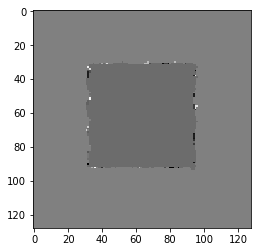

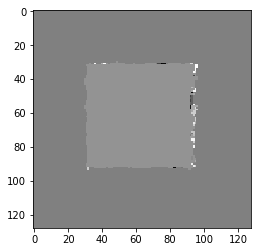

In [19]:
L = cv2.imread(os.path.join('input', 'pair0-L.png'), 0) * (1.0 / 255.0)  # grayscale, [0, 1]
R = cv2.imread(os.path.join('input', 'pair0-R.png'), 0) * (1.0 / 255.0)
D_L = disparity_ssd(L, R)
D_R = disparity_ssd(R, L)
plt.figure()
plt.imshow(D_L, 'gray')
plt.figure()
plt.imshow(D_R, 'gray')


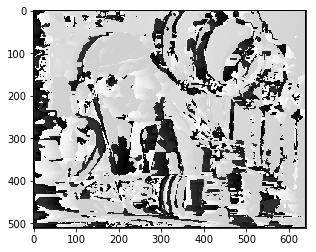

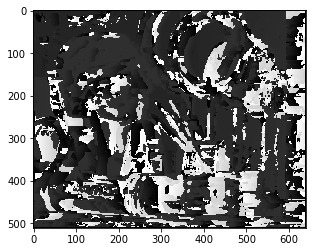

In [25]:
L = cv2.imread('input/pair1-L.png', 0)
R = cv2.imread('input/pair1-R.png', 0)
D_L = np.abs(disparity_ssd(L, R, window_size=7, search_range=100))
D_R = np.abs(disparity_ssd(R, L, window_size=7, search_range=100))

D_L = cv2.normalize(D_L, D_L, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
D_R = cv2.normalize(D_R, D_R, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.figure()
plt.imshow(D_L, 'gray')
plt.figure()
plt.imshow(D_R, 'gray')